## Начало лабораторной работы ##

In [39]:
import pandas as pd 
df = pd.read_csv("..//static//csv//heart_2020_cleaned.csv").head(1000)
print(df.columns)

min_bmi = df['BMI'].min()
max_bmi = df['BMI'].max()

print(f"Минимальное значение BMI: {min_bmi}")
print(f"Максимальное значение BMI: {max_bmi}")

min_sleep = df['SleepTime'].min()
max_sleep = df['SleepTime'].max()

print(f"Минимальное значение Sleep Time: {min_sleep}")
print(f"Максимальное значение Sleep Time: {max_sleep}")

min_physical_health = df['PhysicalHealth'].min()
max_physical_health = df['PhysicalHealth'].max()

print(f"Минимальное значение Physical Health: {min_physical_health}")
print(f"Максимальное значение Physical Health: {max_physical_health}")

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')
Минимальное значение BMI: 14.69
Максимальное значение BMI: 75.82
Минимальное значение Sleep Time: 1.0
Максимальное значение Sleep Time: 18.0
Минимальное значение Physical Health: 0.0
Максимальное значение Physical Health: 30.0


In [40]:
import numpy as np
from skfuzzy import control as ctrl

bmi = ctrl.Antecedent(np.arange(12, 95, 0.1), "bmi")
sleep = ctrl.Antecedent(np.arange(1, 24, 0.1), "sleep") ## sleep
phys = ctrl.Consequent(np.arange(0, 30, 0.1), "phys") ## physical health

c:\storage\university\3 course\AIM\AIM-PIbd-32-Chubykina-P-P\aimenv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


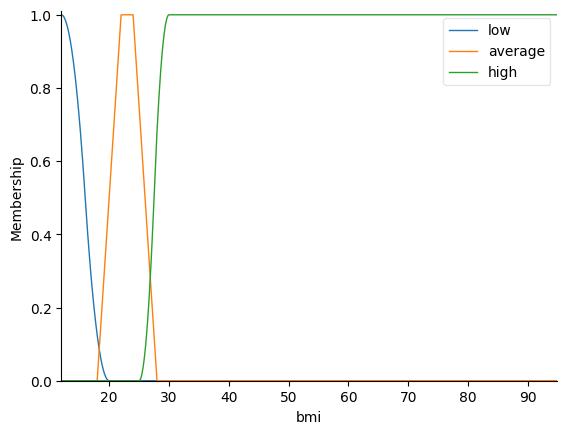

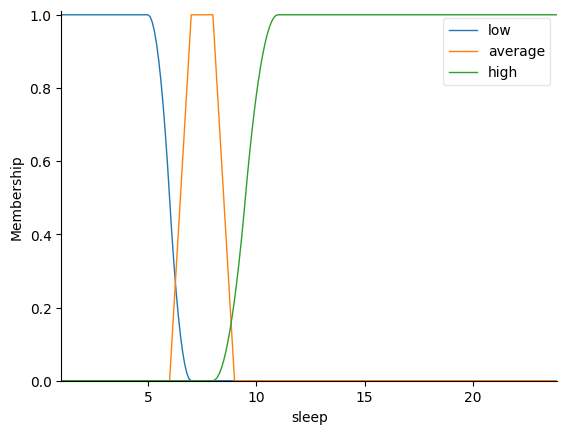

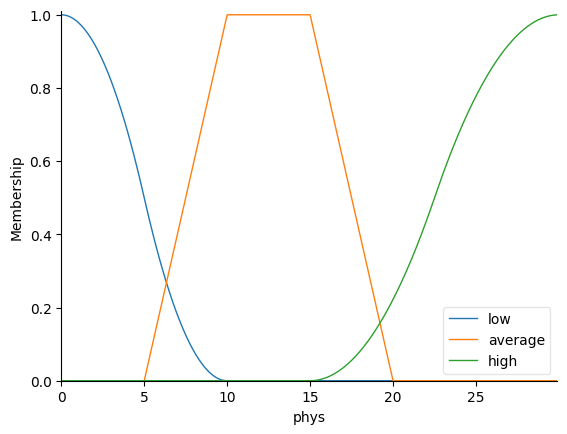

In [41]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 

bmi["low"] = fuzz.zmf(bmi.universe, 12, 20) 
bmi["average"] = fuzz.trapmf(bmi.universe, [18, 22, 24, 28])  
bmi["high"] = fuzz.smf(bmi.universe, 25, 30)  

sleep["low"] = fuzz.zmf(sleep.universe, 5, 7)  
sleep["average"] = fuzz.trapmf(sleep.universe, [6, 7, 8, 9])
sleep["high"] = fuzz.smf(sleep.universe, 8, 11)  

phys["low"] = fuzz.zmf(phys.universe, 0, 10)  
phys["average"] = fuzz.trapmf(phys.universe, [5, 10, 15, 20])  
phys["high"] = fuzz.smf(phys.universe, 15, 30)  

bmi.view()
sleep.view()
phys.view()

(<Figure size 640x480 with 1 Axes>, <Axes: >)

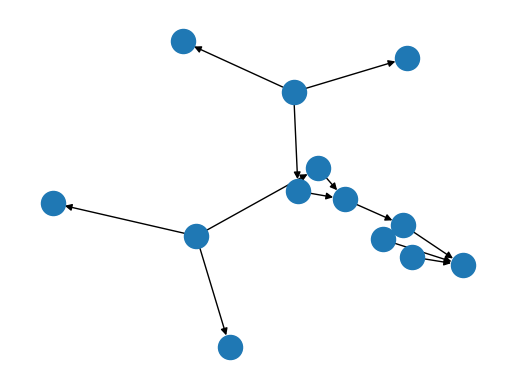

In [42]:
rule1 = ctrl.Rule(bmi["low"] & sleep["high"], phys["high"])
rule2 = ctrl.Rule(bmi["low"] & sleep["average"], phys["high"])
rule3 = ctrl.Rule(bmi["low"] & sleep["low"], phys["average"])
rule4 = ctrl.Rule(bmi["average"] & sleep["high"], phys["high"])
rule5 = ctrl.Rule(bmi["average"] & sleep["average"], phys["average"])
rule6 = ctrl.Rule(bmi["average"] & sleep["low"], phys["average"])
rule7 = ctrl.Rule(bmi["high"] & sleep["high"], phys["average"])
rule8 = ctrl.Rule(bmi["high"] & sleep["average"], phys["low"])
rule9 = ctrl.Rule(bmi["high"] & sleep["low"], phys["low"])

rule1.view()

In [43]:
phys_ctrl = ctrl.ControlSystem(
    [
        rule1,
        rule2,
        rule3,
        rule4,
        rule5,
        rule6,
        rule7,
        rule8,
        rule9,
    ]
)

physes = ctrl.ControlSystemSimulation(phys_ctrl)

In [44]:
physes.input["bmi"] = 22
physes.input["sleep"] = 12
physes.compute()
physes.print_state()
physes.output["phys"]

 Antecedents 
Antecedent: bmi                     = 22
  - low                             : 0.0
  - average                         : 0.9999999999999911
  - high                            : 0.0
Antecedent: sleep                   = 12
  - low                             : 0.0
  - average                         : 0.0
  - high                            : 1.0

 Rules 
RULE #0:
  IF bmi[low] AND sleep[high] THEN phys[high]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - bmi[low]                                               : 0.0
  - sleep[high]                                            : 1.0
                                  bmi[low] AND sleep[high] = 0.0
  Activation (THEN-clause):
                                                phys[high] : 0.0

RULE #1:
  IF bmi[low] AND sleep[average] THEN phys[high]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - bmi[low]                          

np.float64(25.566444064197764)

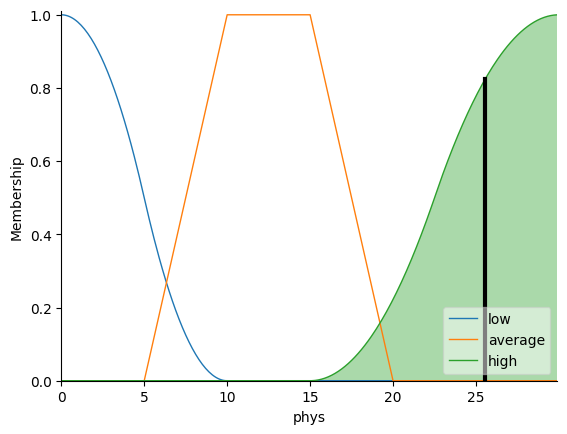

In [45]:
phys.view(sim=physes)

In [46]:
from sklearn.metrics import mean_squared_error, r2_score

true_values = df['PhysicalHealth'].values

predicted_values = []

for bmi_value, sleep_value in zip(df['BMI'], df['SleepTime']):
    physes.input["bmi"] = bmi_value
    physes.input["sleep"] = sleep_value
    physes.compute()
    predicted_values.append(physes.output["phys"])

mse = mean_squared_error(true_values, predicted_values)
r2 = r2_score(true_values, predicted_values)

print(f"MSE: {mse}")
print(f"R2 Score: {r2}")

MSE: 136.45036616095837
R2 Score: -0.6560188941837999
